# Final Project

In [68]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import statsmodels.api as sma

In [69]:
df = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")

In [70]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
df.shape

(16719, 16)

In [72]:
df = df.drop(['Name', 'User_Score', 'User_Count', 'Rating', 'Developer', 'Publisher'], axis=1)

In [73]:
df.isna().sum()

Platform              0
Year_of_Release     269
Genre                 2
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
dtype: int64

In [74]:
df = df.dropna(axis=0)

In [75]:
df.shape

(7983, 10)

In [76]:
df.dtypes

Platform            object
Year_of_Release    float64
Genre               object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
dtype: object

In [77]:
for col in df.columns:
    print(f"{col}:\n {df[col].value_counts()}\n")

Platform:
 Platform
PS2     1275
X360     894
PS3      804
DS       708
XB       706
PC       699
Wii      568
PSP      456
GC       437
GBA      430
PS4      252
PS       196
XOne     169
3DS      166
PSV      119
WiiU      90
DC        14
Name: count, dtype: int64

Year_of_Release:
 Year_of_Release
2008.0    715
2007.0    692
2005.0    655
2009.0    651
2002.0    627
2006.0    620
2003.0    585
2004.0    561
2010.0    500
2011.0    500
2001.0    326
2012.0    321
2013.0    273
2014.0    261
2016.0    232
2015.0    225
2000.0    143
1999.0     39
1998.0     28
1997.0     17
1996.0      8
1994.0      1
1985.0      1
1992.0      1
1988.0      1
Name: count, dtype: int64

Genre:
 Genre
Action          1851
Sports          1165
Shooter          923
Role-Playing     731
Racing           725
Misc             509
Platform         490
Fighting         405
Simulation       348
Adventure        320
Strategy         296
Puzzle           220
Name: count, dtype: int64

NA_Sales:
 NA_Sales
0.00    

In [78]:
Platform_mapping = {
    'PS2': 1, 
    'X360': 2,
    'PS3': 3,
    'DS': 4,
    'XB': 5,
    'PC': 6,
    'Wii': 7,
    'PSP': 8,
    'GC': 9,
    'GBA': 10,
    'PS4': 11,
    'PS': 12,
    'XOne': 13,
    '3DS': 14,
    'PSV': 15,
    'WiiU': 16,
    'DC': 17
    }
# Update the 'Platform' column based on the mapping
df['Platform'] = df['Platform'].map(Platform_mapping)

In [79]:
Genre_mapping = {
    'Action': 1, 
    'Sports': 2,
    'Shooter': 3,
    'Role-Playing': 4,
    'Racing': 5,
    'Misc': 6,
    'Platform': 7,
    'Fighting': 8,
    'Simulation': 9,
    'Adventure': 10,
    'Strategy': 11,
    'Puzzle': 12
    }
# Update the 'Platform' column based on the mapping
df['Genre'] = df['Genre'].map(Genre_mapping)

In [80]:
df.dtypes

Platform             int64
Year_of_Release    float64
Genre                int64
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
dtype: object

In [81]:
df.shape

(7983, 10)

C:\Users\Sharon\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


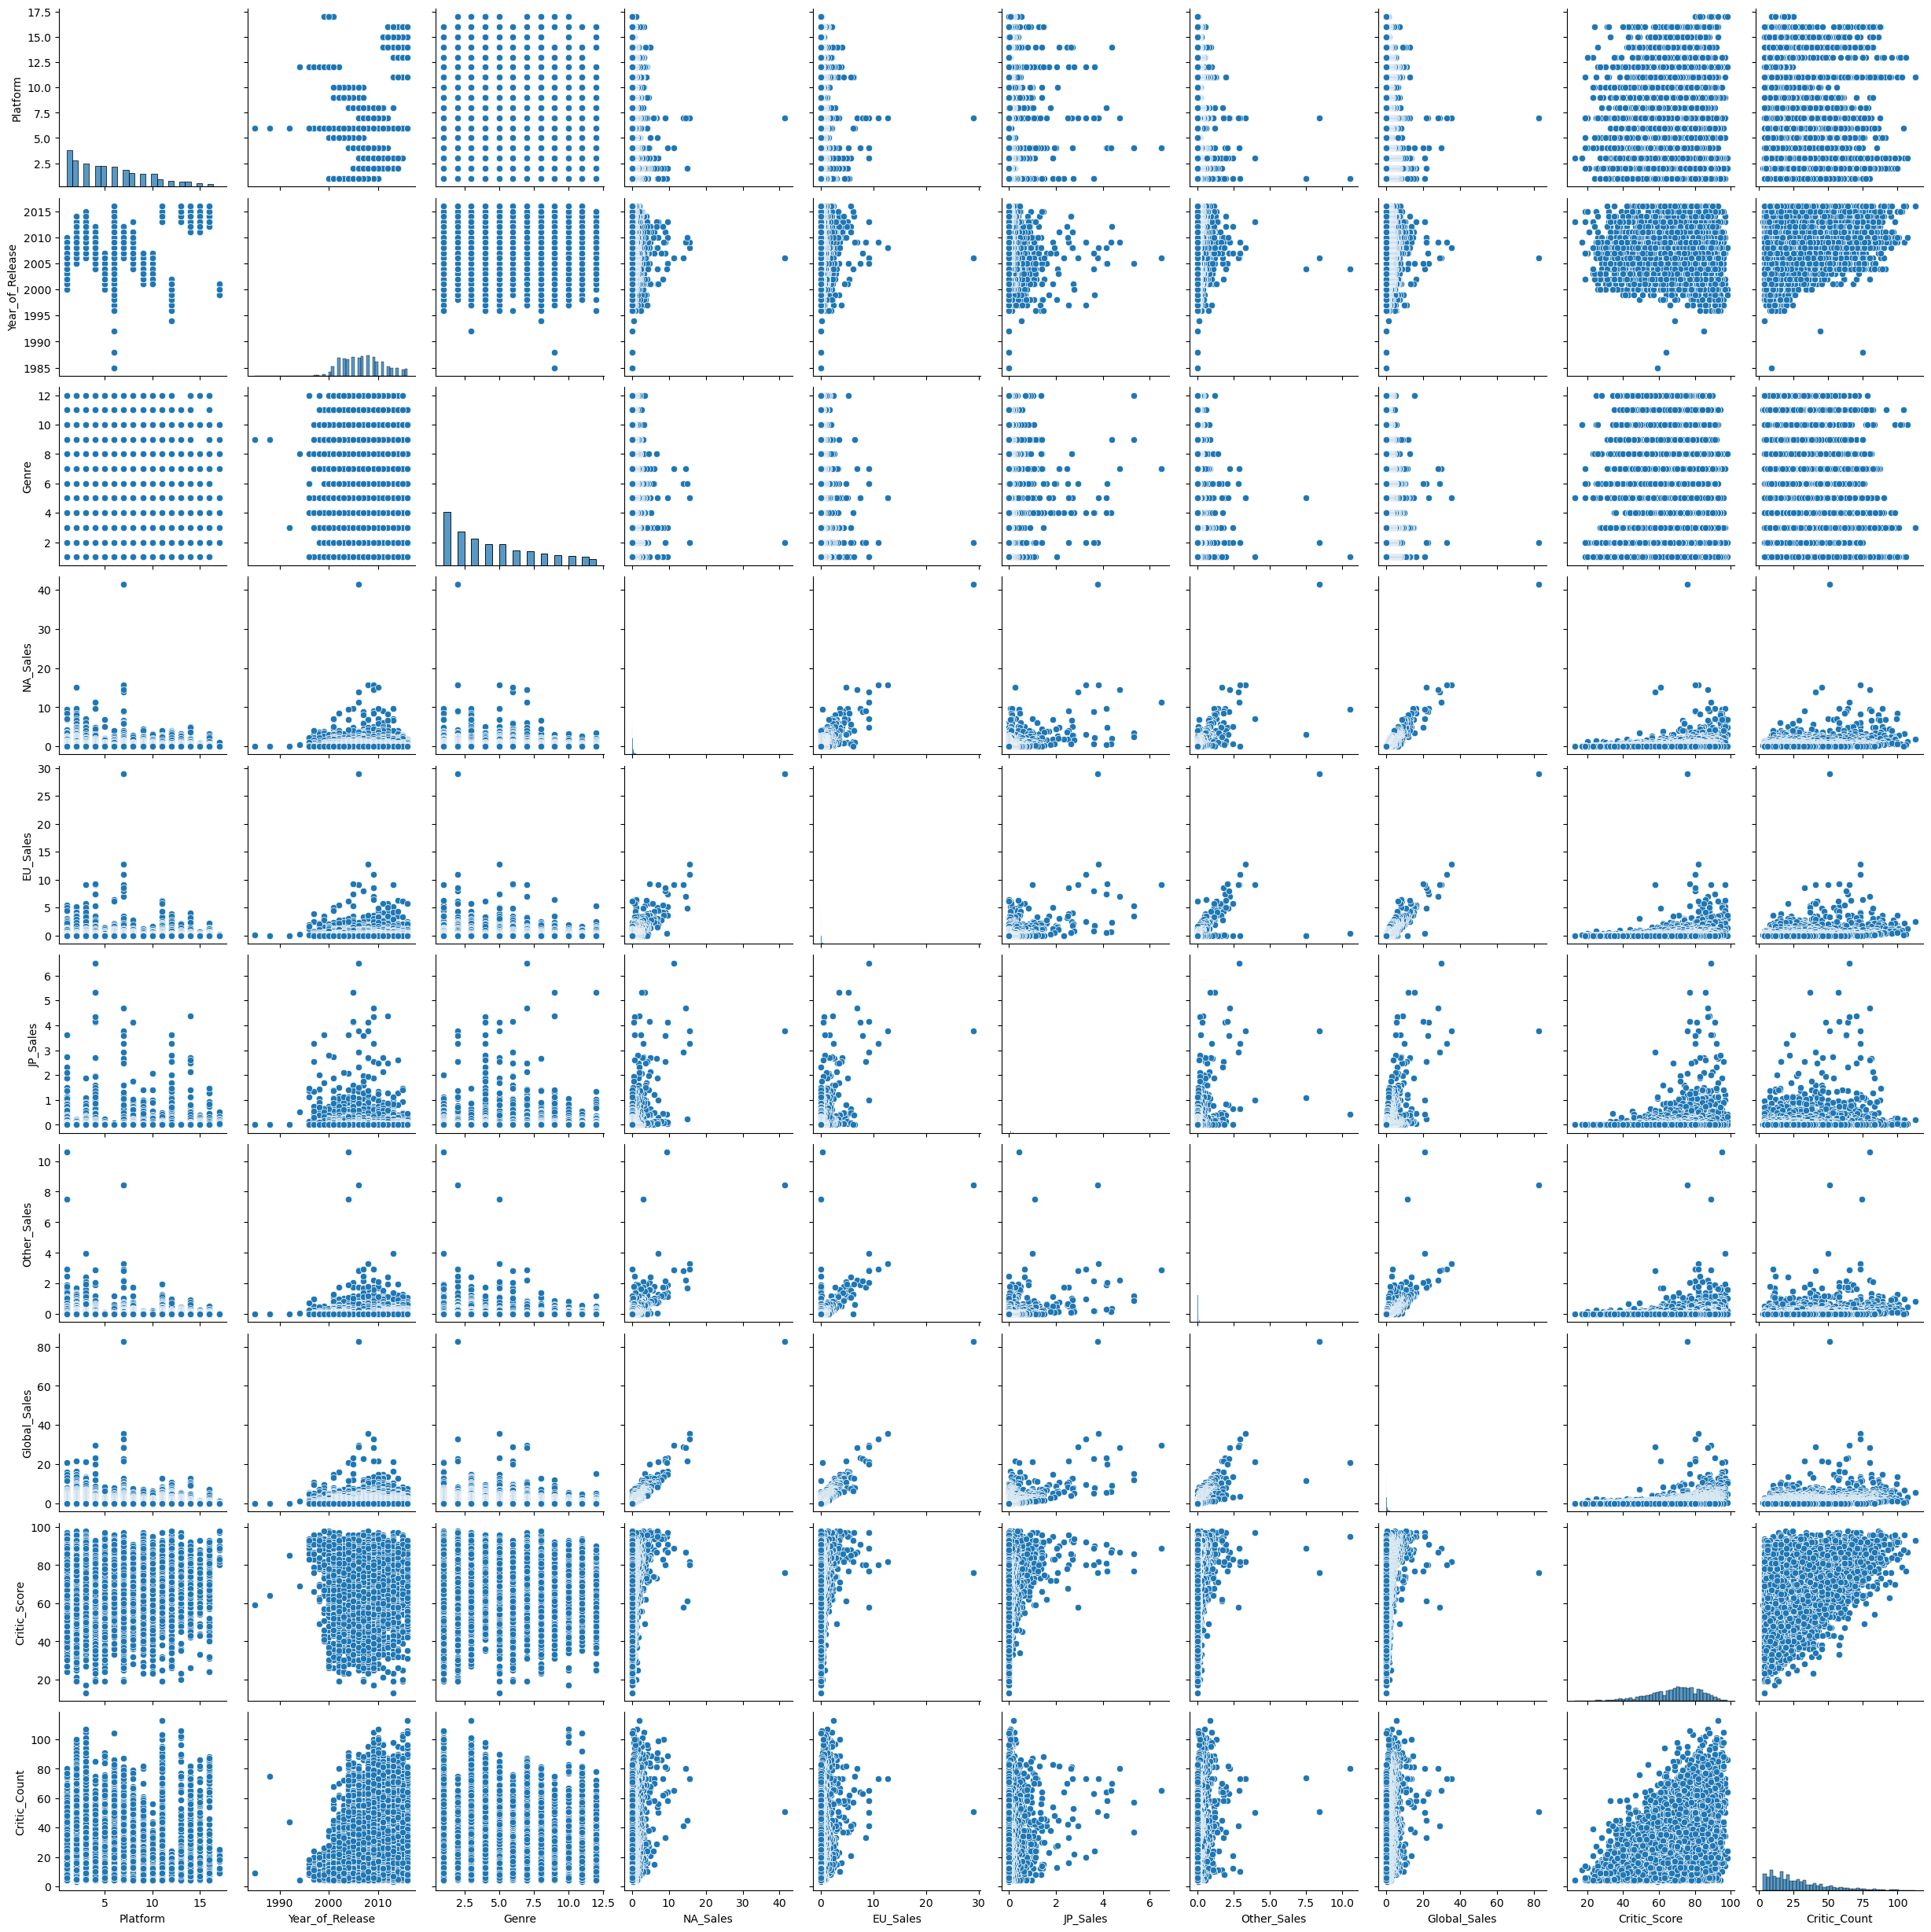

In [82]:
sns.pairplot(data=df)

In [83]:
X = df.drop(columns = ['Global_Sales'])
y = df['Global_Sales']

In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
scaled = StandardScaler().fit_transform(X)

In [86]:
x_scaled = pd.DataFrame(scaled, columns = X.columns, index = X.index)
x_scaled.head()

,Platform,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count
0,0.349225,-0.284731,-0.756305,45.433730,44.874554,13.889886,33.341996,0.503308,1.292090
2,0.349225,0.192691,0.173269,16.980493,19.588896,13.964682,12.804409,0.934367,2.449562
3,0.349225,0.431403,-0.756305,16.902934,16.732553,12.057393,11.451157,0.790681,2.449562
6,-0.419134,-0.284731,0.792985,12.105328,13.938644,24.099491,11.172547,1.437270,2.028663
7,0.349225,-0.284731,0.483127,15.074747,14.001077,10.748469,11.013341,-0.789871,0.765967


In [87]:
X.head()

,Platform,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count
0,7,2006.0,2,41.36,28.96,3.77,8.45,76.0,51.0
2,7,2008.0,5,15.68,12.76,3.79,3.29,82.0,73.0
3,7,2009.0,2,15.61,10.93,3.28,2.95,80.0,73.0
6,4,2006.0,7,11.28,9.14,6.50,2.88,89.0,65.0
7,7,2006.0,6,13.96,9.18,2.93,2.84,58.0,41.0


In [88]:
from sklearn.feature_selection import SelectKBest,f_regression
fs = SelectKBest(score_func=f_regression, k=2)
best = fs.fit_transform(x_scaled,y)

#get all feature names
features = x_scaled.columns

#get features it deemed best to use
best_features = features[fs.get_support()]
print(best_features) 

Index(['NA_Sales', 'EU_Sales'], dtype='object')


<Axes: xlabel='NA_Sales', ylabel='Global_Sales'>

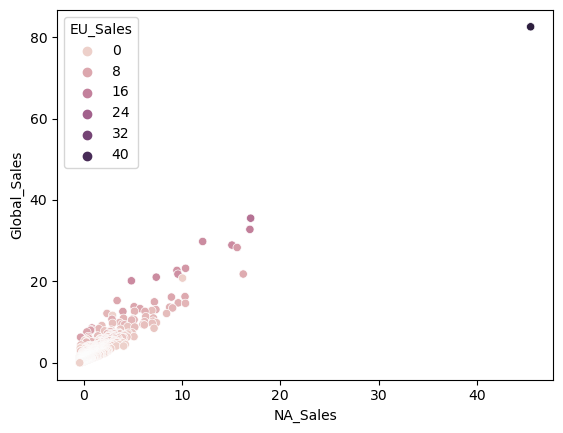

In [89]:
sns.scatterplot( x=x_scaled['NA_Sales'], y=y, hue=x_scaled['EU_Sales'])

## Modeling

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled[best_features], y, test_size = 0.3, random_state = 7)

In [98]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((5588, 2), (5588,), (2395, 2), (2395,))

In [99]:
from sklearn import linear_model

In [100]:
# initialize linear regression model
lr = linear_model.LinearRegression()
# fit the model with our X and y
lr_model = lr.fit(X_train, y_train)

### StatsModel OLS Method

In [101]:
# We add a constant to allow OLS to take into account the y-intercept
X2_train = sma.add_constant(X_train)
#create OLS model and fit it
est = sma.OLS(y_train, X2_train).fit()

### Evaluate

In [102]:
#call the summary
from statsmodels.tools.eval_measures import rmse

In [103]:
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                 8.528e+04
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:15:13   Log-Likelihood:                -1105.4
No. Observations:                5588   AIC:                             2217.
Df Residuals:                    5585   BIC:                             2237.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6962      0.004    176.422      0.0

In [104]:
#Make some predictions to get RMSE
ols_pred = est.predict(sma.add_constant(X_test))
print("\nRMSE",rmse(y_test,ols_pred))


RMSE 0.26825486285422145


### sklearn model evaluation

In [105]:
#look at the intercept and slope of the model. 
print('Model Intercept:',lr_model.intercept_)
print('Model Slope:' ,lr_model.coef_[0])

#Get our coefficient of determination
print('Coefficient of Determination:',lr_model.score(X_test, y_test))

#creates table to show the features and their coefficients 
coeff_df = pd.DataFrame(lr_model.coef_, X_test.columns, columns=['Coefficients'])
coeff_df

Model Intercept: 0.6961730038316523
Model Slope: 1.0792180275368872
Coefficient of Determination: 0.9849364957660641


,Coefficients
NA_Sales,1.079218
EU_Sales,0.849268


TypeError: 'module' object is not callable

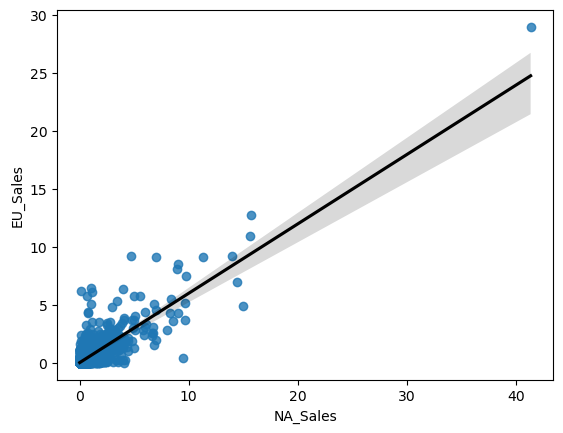

In [107]:
plot_rnet = sns.regplot(data = df,x="NA_Sales", y="EU_Sales",line_kws={'color':'black',
                                                                           'label':'$y=%5.4sx+%5.5s$'%(lr_model.coef_[0],lr_model.intercept_)})
plt.legend()

In [109]:
y_pred = lr_model.predict(X_test)

In [110]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred,squared = False)

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', rmse)

Mean Absolute Error: 0.08852764726963994
Mean Square Error: 0.07196067144493733
Root Mean Square Error: 0.2682548628542218
